In [1]:
# Import the required libraries
import dask.dataframe as dd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency


In [2]:
data = dd.from_pandas(pd.read_csv('./loan data/loan_data_2007_2014.csv'), npartitions=1)


/tmp/ipykernel_2731879/14723756.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = dd.from_pandas(pd.read_csv('./loan data/loan_data_2007_2014.csv'), npartitions=1)


In [3]:
pd.options.display.max_columns = None
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info(verbose=1)

<class 'dask.dataframe.core.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           466285 non-null      int64
 1   member_id                    466285 non-null      int64
 2   loan_amnt                    466285 non-null      int64
 3   funded_amnt                  466285 non-null      int64
 4   funded_amnt_inv              466285 non-null      float64
 5   term                         466285 non-null      object
 6   int_rate                     466285 non-null      float64
 7   installment                  466285 non-null      float64
 8   grade                        466285 non-null      object
 9   sub_grade                    466285 non-null      object
10   emp_title                    438697 non-null      object
11   emp_length                   445277 non-null      object
12   home_ownership             

In [5]:
na_values = data.isnull().mean().compute()
na_values[na_values>0.8]

mths_since_last_record       0.865666
annual_inc_joint             1.000000
dti_joint                    1.000000
verification_status_joint    1.000000
open_acc_6m                  1.000000
open_il_6m                   1.000000
open_il_12m                  1.000000
open_il_24m                  1.000000
mths_since_rcnt_il           1.000000
total_bal_il                 1.000000
il_util                      1.000000
open_rv_12m                  1.000000
open_rv_24m                  1.000000
max_bal_bc                   1.000000
all_util                     1.000000
inq_fi                       1.000000
total_cu_tl                  1.000000
inq_last_12m                 1.000000
dtype: float64

In [6]:
data = data.drop(na_values[na_values>0.8].index, axis=1)

In [7]:
data.info(verbose=1)

<class 'dask.dataframe.core.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           466285 non-null      int64
 1   member_id                    466285 non-null      int64
 2   loan_amnt                    466285 non-null      int64
 3   funded_amnt                  466285 non-null      int64
 4   funded_amnt_inv              466285 non-null      float64
 5   term                         466285 non-null      object
 6   int_rate                     466285 non-null      float64
 7   installment                  466285 non-null      float64
 8   grade                        466285 non-null      object
 9   sub_grade                    466285 non-null      object
10   emp_title                    438697 non-null      object
11   emp_length                   445277 non-null      object
12   home_ownership             

In [8]:
data = data.drop(columns=['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                        'recoveries', 'total_rec_prncp', 'total_rec_late_fee'])


In [9]:
# explore the unique values in loan_status column
data['loan_status'].value_counts(normalize=True).compute()


Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [10]:
# create a new column based on the loan_status column that will be our target variable
data['good_bad'] = dd.from_array(np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1))
# Drop the original 'loan_status' column
data = data.drop(columns=['loan_status'])


In [11]:
data['good_bad'].value_counts(normalize=True).compute()

1    0.8569
0    0.1431
Name: good_bad, dtype: float64

In [12]:
X = data.drop('good_bad', axis=1)
y = data['good_bad']

In [13]:
def emp_prep(val):
     if pd.isnull(val):
         return 0
     
     emp = str(val).replace('\+ years', '')
     emp = emp.replace('< 1 year', '0')
     emp = emp.replace(' years', '')
     emp = emp.replace(' year', '')
     emp = emp.replace('+', '')
     return float(emp)


In [14]:
X['emp_length'] = X['emp_length'].apply(
    emp_prep, meta=('emp_length', 'object'))


In [15]:
X['emp_length'].unique().compute().to_list()

[10.0, 0.0, 1.0, 3.0, 8.0, 9.0, 4.0, 5.0, 6.0, 2.0, 7.0]

In [16]:
X['emp_length'].describe().compute()


unique        11.0
count     466285.0
top           10.0
freq      150049.0
Name: emp_length, dtype: float64

In [18]:
# convert date columns to datetime format and create a new column as a difference between today and the respective date
def date_columns(df, column):
    # convert to datetime format
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = dd.to_datetime(df[column]).rsub(pd.Timestamp('now').floor('d')).div(np.timedelta64(1, 'M')).round()
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(
        lambda x: df['mths_since_' + column].max() if x < 0 else x, meta=('mths_since_' + column, 'float64'))
    # drop the original date column
    df = df.drop(columns=[column])


# apply to X_train
date_columns(X, 'earliest_cr_line')
date_columns(X, 'issue_d')
date_columns(X, 'last_pymnt_d')
date_columns(X, 'last_credit_pull_d')

In [ ]:
# let's check these new columns
print(X['mths_since_earliest_cr_line'].describe().compute())
print(X['mths_since_issue_d'].describe().compute())
print(X['mths_since_last_pymnt_d'].describe().compute())
print(X['mths_since_last_credit_pull_d'].describe().compute())

In [15]:
# function to remove 'months' string from the 'term' column and convert it to numeric
def loan_term_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))


loan_term_converter(X, 'term')

In [16]:
# first divide training data into categorical and numerical subsets
X_cat = X.select_dtypes(include='object').copy()
X_num = X.select_dtypes(include='number').copy()

In [17]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_cat:
    chi, p, dof, ex = chi2_contingency(
        pd.crosstab(y, X_cat[column]))
    chi2_check.setdefault('Feature', []).append(column)
    chi2_check.setdefault('p-value', []).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data=chi2_check)
chi2_result.sort_values(by=['p-value'], ascending=True,
                        ignore_index=True, inplace=True)
chi2_result

,Feature,p-value
0,grade,0.000000
1,home_ownership,0.000000
2,verification_status,0.000000
3,purpose,0.000000
4,addr_state,0.000000
5,initial_list_status,0.000000
6,pymnt_plan,0.007186
7,application_type,1.000000


We'll keep only the top four categorical features

In [18]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
X_num.fillna(X_num.mean(), inplace=True)
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_num, y)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data={'Numerical_Feature': X_num.columns.values,
                             'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(
    by=['F-Score'], ascending=False, ignore_index=True, inplace=True)
ANOVA_F_table

/home/main/Documents/kazispaces/dsrc/py/finlytik-app/fin/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/main/Documents/kazispaces/dsrc/py/finlytik-app/fin/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Numerical_Feature,F-Score,p values
0,collection_recovery_fee,45855.327140,0.000000e+00
1,mths_since_last_pymnt_d,29460.271841,0.000000e+00
2,total_pymnt_inv,18464.519835,0.000000e+00
3,total_pymnt,18320.936906,0.000000e+00
4,int_rate,14276.559279,0.000000e+00
5,last_pymnt_amnt,13547.497437,0.000000e+00
6,out_prncp,12043.314244,0.000000e+00
7,out_prncp_inv,12041.196734,0.000000e+00
8,mths_since_last_credit_pull_d,8864.328886,0.000000e+00
9,mths_since_issue_d,3603.719527,0.000000e+00


<AxesSubplot:>

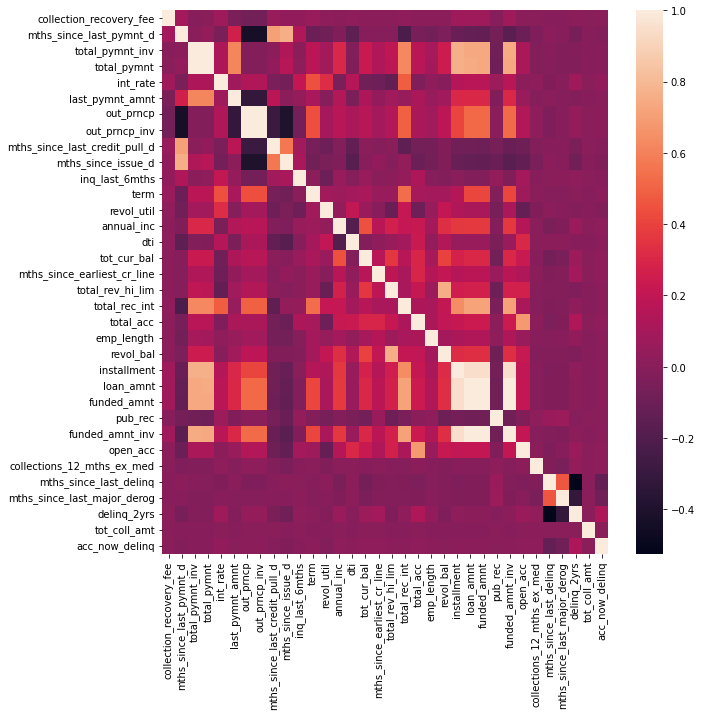

In [19]:
# save the top 20 numerical features in a list
top_num_features = ANOVA_F_table.iloc[:34, 0].to_list()
# calculate pair-wise correlations between them
corrmat = X_num[top_num_features].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat)

we will keep only the top 21 features and ['pub_rec'] and drop ['total_rec_int','last_pymnt_amnt', 'total_pymnt_inv', 'total_rec_int', 'out_prncp_inv'] from the F-score ranking and correlation matrix(heatmap)

In [20]:
# Define a helper function to drop the 4 categorical features with least p-values for chi squared test, 14 numerical features with least F-Statistic
# and 2 numerical features with high multicollinearity
drop_columns_list = ANOVA_F_table.iloc[26:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[4:, 0].to_list())
drop_columns_list.extend(['total_rec_int', 'last_pymnt_amnt',
                         'total_pymnt_inv', 'total_rec_int', 'out_prncp_inv', 'revol_bal', 'installment', 'loan_amnt', 'funded_amnt'])


def col_to_drop(df, columns_list):
    df.drop(columns=columns_list, inplace=True)


# apply to X_train
col_to_drop(X, drop_columns_list)


In [21]:
X.describe()

,term,int_rate,emp_length,annual_inc,dti,inq_last_6mths,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,collection_recovery_fee,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
count,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,3.960090e+05,3.960090e+05,466256.000000,466285.000000,465909.000000,466243.000000
mean,42.605334,13.829236,5.723307,7.327738e+04,17.218758,0.804745,0.160564,56.176947,25.064430,4410.062342,11540.686220,8.961534,1.388017e+05,3.037909e+04,291.385374,100.255187,80.294369,76.045588
std,10.719040,4.357587,3.756084,5.496357e+04,7.851121,1.091598,0.510863,23.732628,11.600141,6355.078769,8265.627112,85.491437,1.521147e+05,3.724713e+04,86.460310,14.340154,12.809898,9.636423
min,36.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,122.000000,85.000000,72.000000,72.000000
25%,36.000000,10.990000,2.000000,4.500000e+04,11.360000,0.000000,0.000000,39.200000,17.000000,0.000000,5552.125349,0.000000,2.861800e+04,1.350000e+04,233.000000,90.000000,72.000000,72.000000
50%,36.000000,13.660000,6.000000,6.300000e+04,16.870000,0.000000,0.000000,57.600000,23.000000,441.470000,9419.250943,0.000000,8.153900e+04,2.280000e+04,275.000000,96.000000,73.000000,72.000000
75%,60.000000,16.490000,10.000000,8.896000e+04,22.780000,1.000000,0.000000,74.700000,32.000000,7341.650000,15308.158460,0.000000,2.089530e+05,3.790000e+04,334.000000,106.000000,84.000000,74.000000
max,60.000000,26.060000,10.000000,7.500000e+06,39.990000,33.000000,63.000000,892.300000,156.000000,32160.380000,57777.579870,7002.190000,8.000078e+06,9.999999e+06,636.000000,175.000000,169.000000,176.000000


In [22]:
# Create copies of the 4 training sets to be preprocessed using WoE
X_train_prepr = X.copy()
y_train_prepr = y.copy()

In [23]:
pd.concat([X_train_prepr['grade'], y_train_prepr], axis=1)


,grade,good_bad
0,B,1
1,C,0
2,C,1
3,C,1
4,B,1
...,...,...
466280,C,1
466281,D,0
466282,D,1
466283,A,1


In [24]:
def woe_discrete(df, cat_variabe_name, y_df):
    df = pd.concat([df[cat_variabe_name], y_df], axis=1)
    df_woe_iv = pd.crosstab(df[cat_variabe_name], df['good_bad'], normalize='columns').assign(
        woe=lambda dfx: np.log(dfx[1]/dfx[0])).assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0])))
    return df_woe_iv

In [25]:
# We set the default style of the graphs to the seaborn style.
sns.set()
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.

def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    x = np.array(df_WoE.index.astype(str))
    y = df_WoE['woe']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.index.name)
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.index.name))
    plt.xticks(rotation=rotation_of_x_axis_labels)


##### Grade

In [26]:
df_temp = woe_discrete(X_train_prepr, 'grade', y_train_prepr)
df_temp

good_bad,0,1,woe,iv
grade,,,,
A,0.056840,0.173289,1.114730,0.290782
B,0.211093,0.303792,0.364043,0.290782
C,0.282216,0.267047,-0.055251,0.290782
D,0.232460,0.156603,-0.395001,0.290782
E,0.136635,0.069328,-0.678466,0.290782
F,0.062628,0.024167,-0.952214,0.290782
G,0.018129,0.005774,-1.144166,0.290782


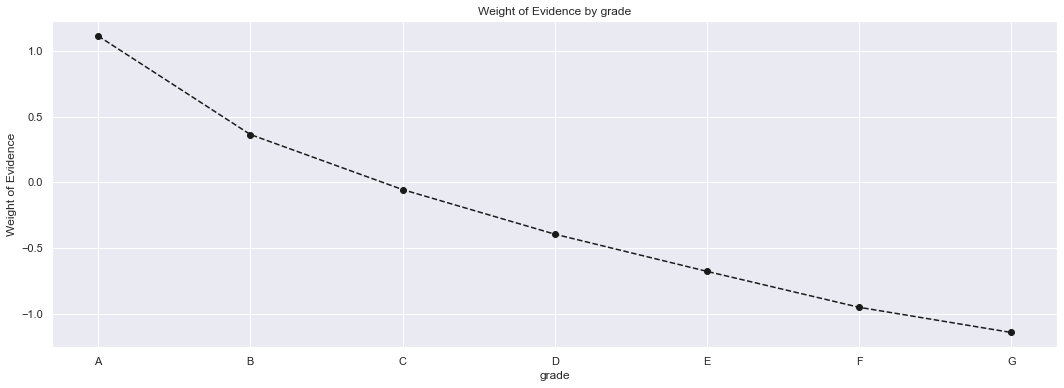

In [27]:
plot_by_woe(df_temp)

In [28]:
df_temp = woe_discrete(X_train_prepr, 'home_ownership', y_train_prepr)
df_temp

good_bad,0,1,woe,iv
home_ownership,,,,
ANY,0.000000,0.000002,inf,inf
MORTGAGE,0.444200,0.513427,0.144832,inf
NONE,0.000157,0.000101,-0.439616,inf
OTHER,0.000746,0.000347,-0.765617,inf
OWN,0.088585,0.089544,0.010764,inf
RENT,0.466312,0.396579,-0.161980,inf


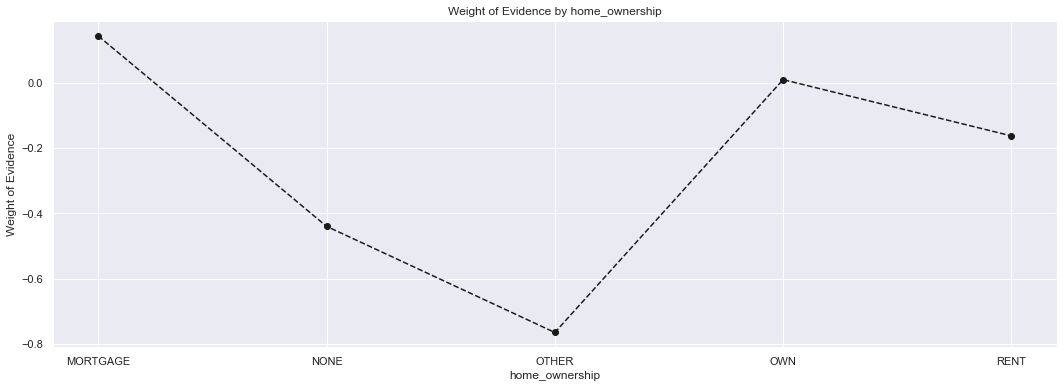

In [29]:
plot_by_woe(df_temp)


##### Verification Status

In [30]:
df_temp = woe_discrete(X_train_prepr, 'verification_status', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
verification_status,,,,
Not Verified,0.273623,0.323346,0.166972,0.020831
Source Verified,0.306408,0.323550,0.054438,0.020831
Verified,0.419969,0.353104,-0.173420,0.020831


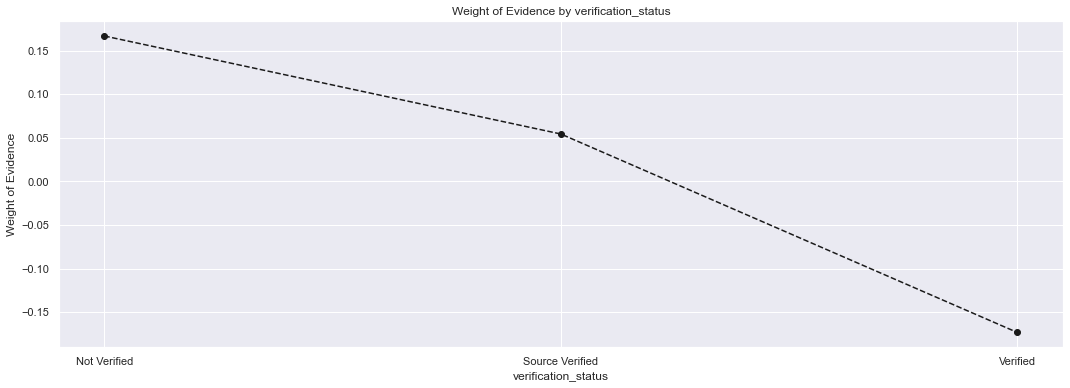

In [31]:
plot_by_woe(df_temp)


##### Purpose

In [32]:
df_temp = woe_discrete(X_train_prepr, 'purpose', y_train_prepr)
df_temp

good_bad,0,1,woe,iv
purpose,,,,
car,0.009437,0.011837,0.226539,0.03698
credit_card,0.176209,0.229165,0.262772,0.03698
debt_consolidation,0.609579,0.585399,-0.040475,0.03698
educational,0.001727,0.000804,-0.764040,0.03698
home_improvement,0.051111,0.057623,0.119940,0.03698
house,0.006239,0.004698,-0.283798,0.03698
major_purchase,0.018423,0.021403,0.149910,0.03698
medical,0.012086,0.009597,-0.230548,0.03698
moving,0.008966,0.006109,-0.383790,0.03698


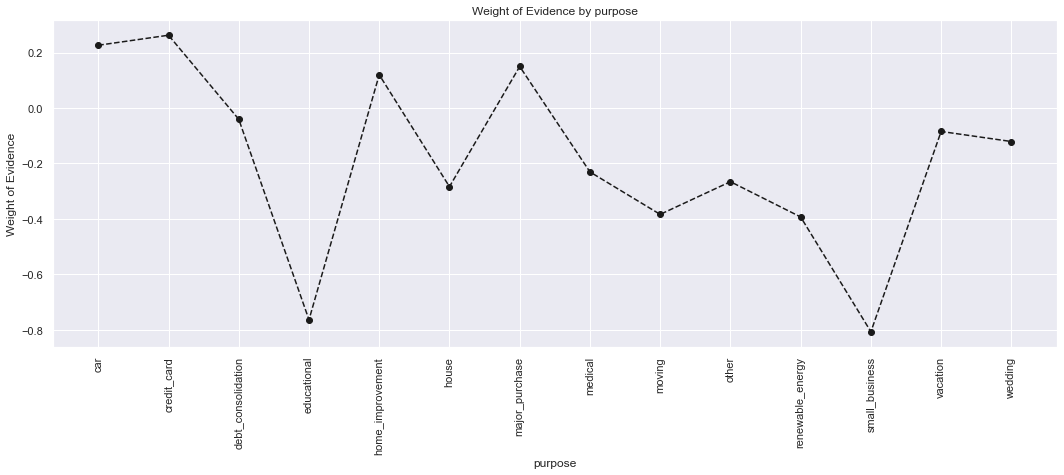

In [33]:
plot_by_woe(df_temp, 90)

##### Analyze WoEs and IVs of numeric features

##### term

In [34]:
df_temp = woe_discrete(X_train_prepr, 'term', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
term,,,,
36,0.643737,0.734723,0.132203,0.03886
60,0.356263,0.265277,-0.294894,0.03886


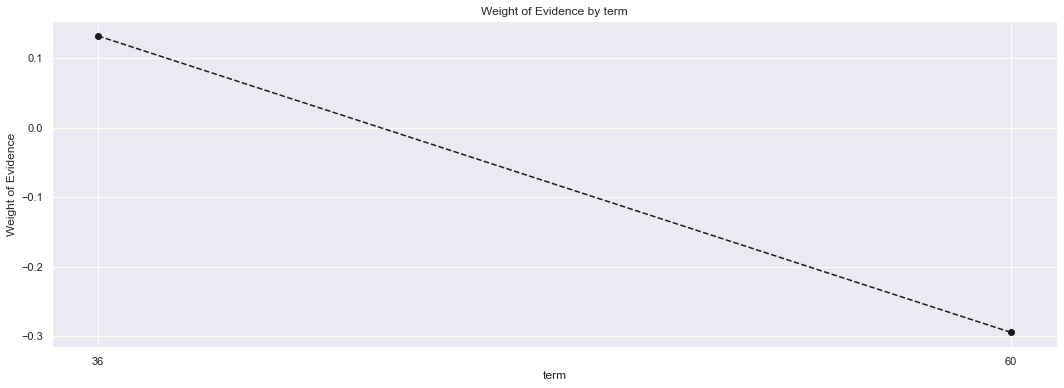

In [35]:
plot_by_woe(df_temp)


In [36]:
# fine-classing using the 'cut' method, given the large number of unique values
X_train_prepr['int_rate_factor'] = pd.cut(X_train_prepr['int_rate'], 50)
# Process 'int_rate_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_discrete(
    X_train_prepr, 'int_rate_factor', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
int_rate_factor,,,,
"(5.399, 5.833]",0.000706,0.002280,1.171936,0.347385
"(5.833, 6.246]",0.004081,0.024889,1.808103,0.347385
"(6.246, 6.658]",0.005454,0.022927,1.435895,0.347385
"(6.658, 7.071]",0.001413,0.005348,1.331203,0.347385
"(7.071, 7.484]",0.001746,0.009289,1.671424,0.347385
"(7.484, 7.897]",0.011497,0.036695,1.160515,0.347385
"(7.897, 8.31]",0.011968,0.027704,0.839321,0.347385
"(8.31, 8.722]",0.005631,0.019231,1.228244,0.347385
"(8.722, 9.135]",0.014421,0.026938,0.624882,0.347385


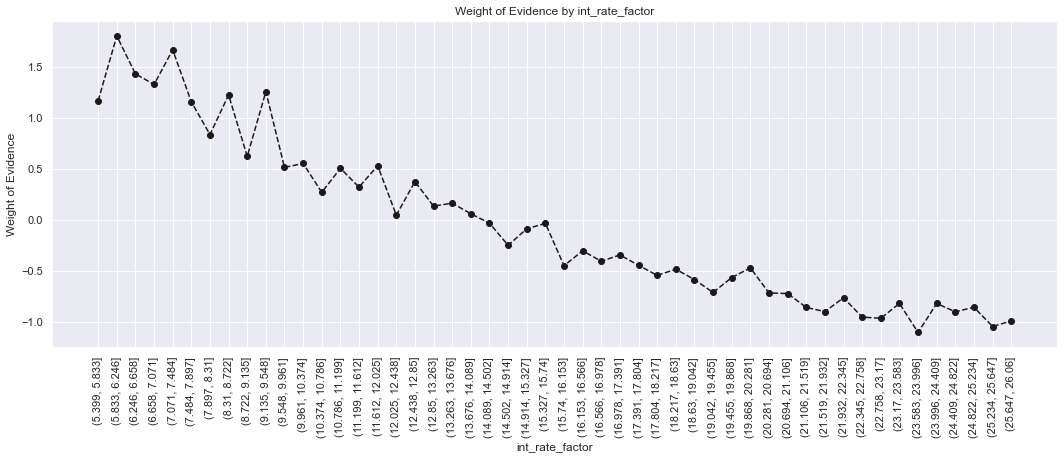

In [37]:
plot_by_woe(df_temp, 90)

##### emp_length

In [38]:
df_temp = woe_discrete(X_train_prepr, 'emp_length', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
emp_length,,,,
0.0,0.139323,0.120804,-0.142623,0.006611
1.0,0.065021,0.063344,-0.026127,0.006611
2.0,0.089095,0.088684,-0.004624,0.006611
3.0,0.078638,0.078465,-0.002192,0.006611
4.0,0.060253,0.060079,-0.002893,0.006611
5.0,0.069416,0.065579,-0.056866,0.006611
6.0,0.059998,0.055509,-0.077766,0.006611
7.0,0.057193,0.056017,-0.020764,0.006611
8.0,0.048364,0.047987,-0.007810,0.006611


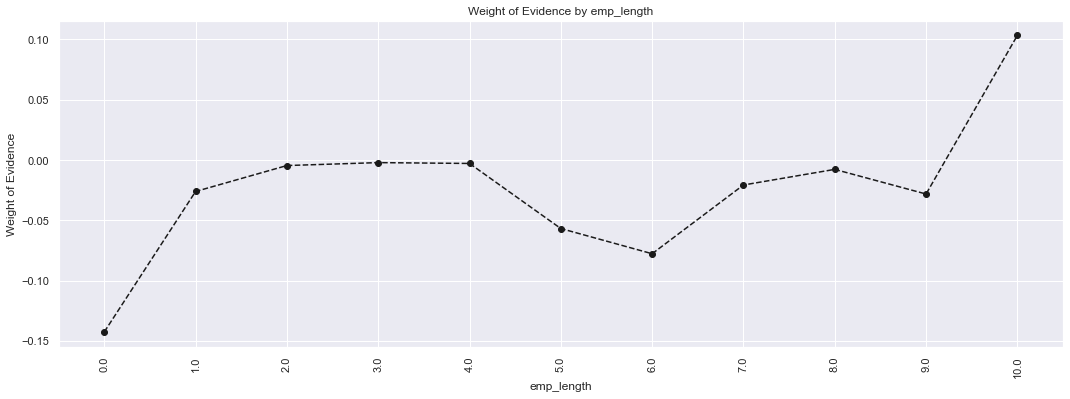

In [39]:
plot_by_woe(df_temp, 90)

The emp_length feature seems like very important but its IV value is useless. Therefore it will be dropped.

##### Annual_inc_factor

In [40]:
# Initial examination shows that there are too few individuals with large income (up to $75m!!) and too many with small income.
# Since 95.6% of observations have income < 151,858, we will have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
X_train_prepr_temp = X_train_prepr[X_train_prepr['annual_inc'] <= 150500].copy()
# fine-classing again
X_train_prepr_temp['annual_inc_factor'] = pd.cut(
    X_train_prepr_temp['annual_inc'], 12)
# make sure to select only the relevant indexes in the target column
df_temp = woe_discrete(
    X_train_prepr_temp, 'annual_inc_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
annual_inc_factor,,,,
"(1747.396, 14279.667]",0.005579,0.003390,-0.498234,0.048236
"(14279.667, 26663.333]",0.056757,0.039785,-0.355302,0.048236
"(26663.333, 39047.0]",0.154283,0.118851,-0.260915,0.048236
"(39047.0, 51430.667]",0.221591,0.191270,-0.147147,0.048236
"(51430.667, 63814.333]",0.174799,0.166720,-0.047320,0.048236
"(63814.333, 76198.0]",0.145592,0.157205,0.076745,0.048236
"(76198.0, 88581.667]",0.082751,0.099990,0.189241,0.048236
"(88581.667, 100965.333]",0.069410,0.090929,0.270048,0.048236
"(100965.333, 113349.0]",0.032724,0.046733,0.356332,0.048236


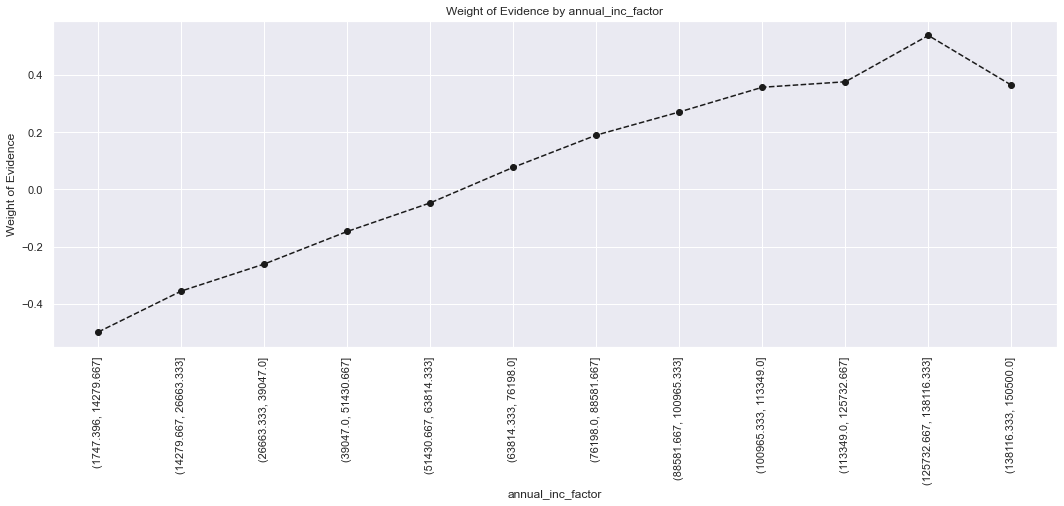

In [41]:
plot_by_woe(df_temp, 90)

##### dti

In [42]:
# fine-classing
X_train_prepr['dti_factor'] = pd.cut(X_train_prepr['dti'], 10)
# Process 'annual_inc_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_discrete(X_train_prepr, 'dti_factor', y_train_prepr)
df_temp

good_bad,0,1,woe,iv
dti_factor,,,,
"(-0.04, 3.999]",0.030725,0.036507,0.172424,0.02603
"(3.999, 7.998]",0.072516,0.094545,0.265264,0.02603
"(7.998, 11.997]",0.125942,0.151431,0.184313,0.02603
"(11.997, 15.996]",0.166732,0.185090,0.104454,0.02603
"(15.996, 19.995]",0.184135,0.179872,-0.023423,0.02603
"(19.995, 23.994]",0.171461,0.150052,-0.133374,0.02603
"(23.994, 27.993]",0.127001,0.104980,-0.190427,0.02603
"(27.993, 31.992]",0.079344,0.063190,-0.227641,0.02603
"(31.992, 35.991]",0.035905,0.028470,-0.232029,0.02603


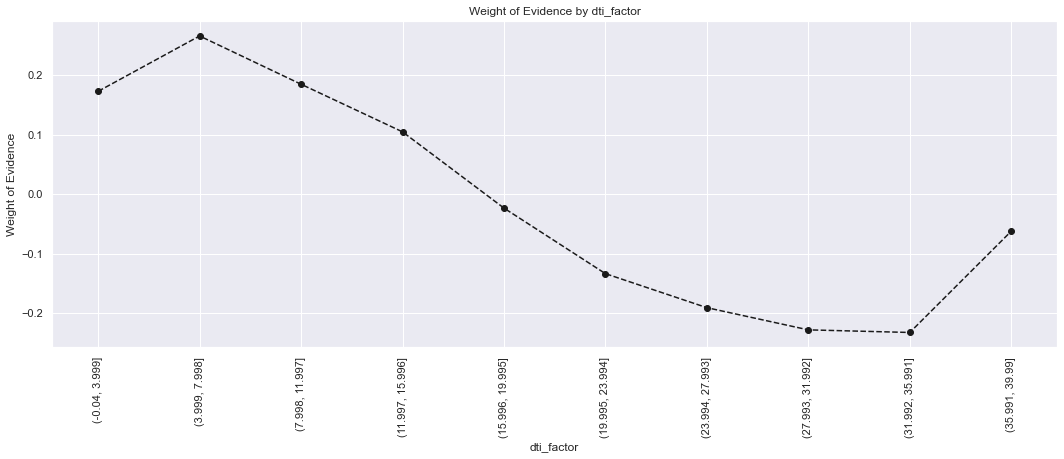

In [43]:
plot_by_woe(df_temp, 90)

In [44]:
X_train_prepr['inq_last_6mths_factor'] = pd.cut(X_train_prepr['inq_last_6mths'], 7)

df_temp = woe_discrete(X_train_prepr, 'inq_last_6mths_factor', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
inq_last_6mths_factor,,,,
"(-0.033, 4.714]",0.982439,0.991517,0.009198,0.006902
"(4.714, 9.429]",0.016953,0.008329,-0.710678,0.006902
"(9.429, 14.143]",0.000373,0.000113,-1.192132,0.006902
"(14.143, 18.857]",0.000157,0.000024,-1.874697,0.006902
"(18.857, 23.571]",0.000020,0.000005,-1.404693,0.006902
"(23.571, 28.286]",0.000020,0.000010,-0.711546,0.006902
"(28.286, 33.0]",0.000039,0.000002,-2.790988,0.006902


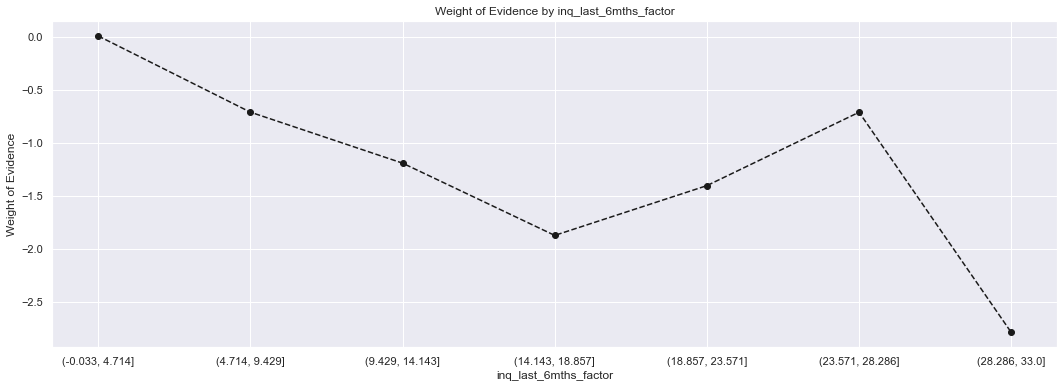

In [45]:
plot_by_woe(df_temp)

We will drop this feature

In [46]:
# Initial examination shows that there are some obs with utilization of >1 times which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['revol_util'] <= 1].copy()
# fine-classing
X_train_prepr_temp['revol_util_factor'] = pd.cut(
    X_train_prepr_temp['revol_util'], 10)
# preprocess 'revol_util'
df_temp = woe_discrete(
    X_train_prepr_temp, 'revol_util_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
revol_util_factor,,,,
"(-0.001, 0.1]",0.744292,0.650301,-0.134998,0.081965
"(0.1, 0.2]",0.052511,0.049398,-0.061129,0.081965
"(0.2, 0.3]",0.022831,0.044880,0.675860,0.081965
"(0.3, 0.4]",0.045662,0.040361,-0.123394,0.081965
"(0.4, 0.5]",0.027397,0.037349,0.309874,0.081965
"(0.5, 0.6]",0.011416,0.032831,1.056409,0.081965
"(0.6, 0.7]",0.031963,0.039157,0.202976,0.081965
"(0.7, 0.8]",0.018265,0.036446,0.690848,0.081965
"(0.8, 0.9]",0.027397,0.032530,0.171723,0.081965


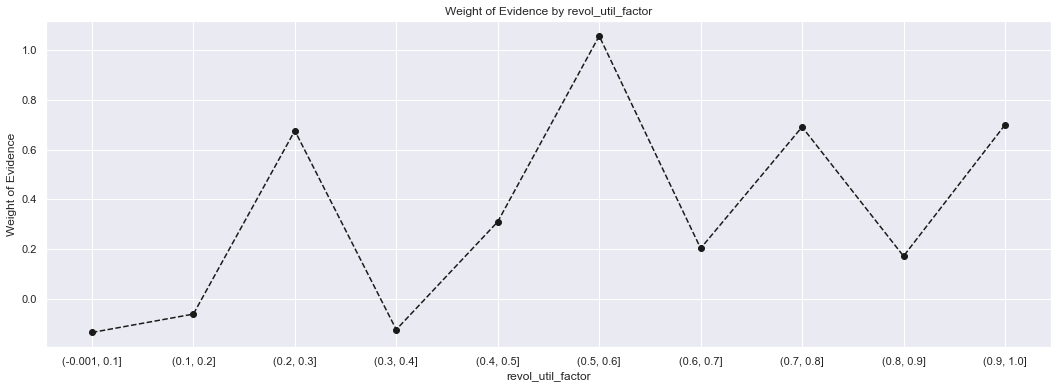

In [47]:
plot_by_woe(df_temp)

In [48]:
# Initial examination shows that there are some obs >50 accounts which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_acc'] <= 50].copy()
# fine-classing
X_train_prepr_temp['total_acc_factor'] = pd.cut(
    X_train_prepr_temp['total_acc'], 24)
# preprocess 'total_acc'
df_temp = woe_discrete(
    X_train_prepr_temp, 'total_acc_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
total_acc_factor,,,,
"(0.951, 3.042]",0.002261,0.001101,-0.719495,0.007809
"(3.042, 5.083]",0.011204,0.008292,-0.301006,0.007809
"(5.083, 7.125]",0.022428,0.018271,-0.204990,0.007809
"(7.125, 9.167]",0.035429,0.030217,-0.159129,0.007809
"(9.167, 11.208]",0.048369,0.043134,-0.114543,0.007809
"(11.208, 13.25]",0.059654,0.054207,-0.095741,0.007809
"(13.25, 15.292]",0.067527,0.063476,-0.061865,0.007809
"(15.292, 17.333]",0.073765,0.070614,-0.043647,0.007809
"(17.333, 19.375]",0.074834,0.073304,-0.020669,0.007809


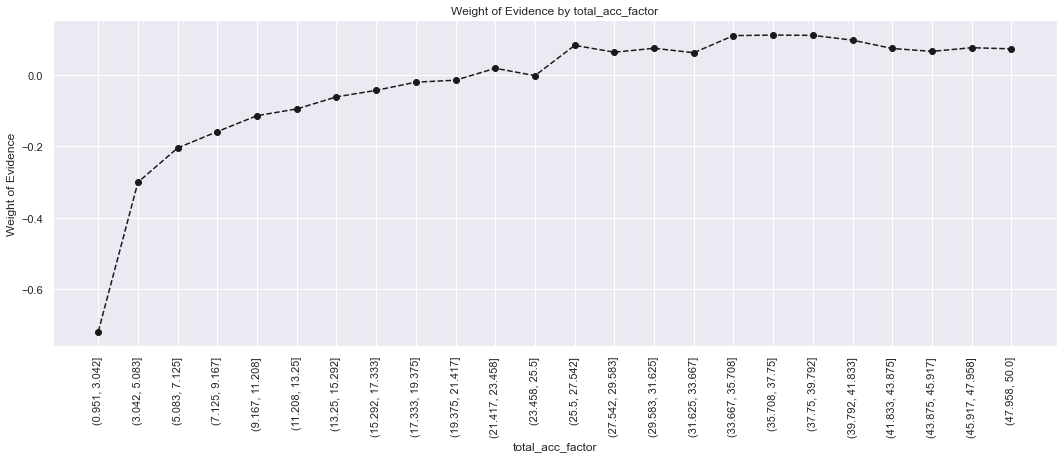

In [49]:
plot_by_woe(df_temp,90)

The feature will be dropped bacuse of its low IV value

In [50]:
# Initial examination shows that there are some obs >50 accounts which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['collection_recovery_fee'] <= 1000].copy(
)
# fine-classing
X_train_prepr_temp['collection_recovery_fee_factor'] = pd.cut(
    X_train_prepr_temp['collection_recovery_fee'], 10)
# preprocess 'total_acc'
df_temp = woe_discrete(
    X_train_prepr_temp, 'collection_recovery_fee_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


/home/main/Documents/kazispaces/dsrc/py/finlytik-app/fin/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


good_bad,0,1,woe,iv
collection_recovery_fee_factor,,,,
"(-0.999, 99.923]",0.848042,1.0,0.164825,inf
"(99.923, 199.845]",0.035971,0.0,-inf,inf
"(199.845, 299.768]",0.028471,0.0,-inf,inf
"(299.768, 399.691]",0.024146,0.0,-inf,inf
"(399.691, 499.613]",0.018114,0.0,-inf,inf
"(499.613, 599.536]",0.013948,0.0,-inf,inf
"(599.536, 699.459]",0.011250,0.0,-inf,inf
"(699.459, 799.381]",0.008472,0.0,-inf,inf
"(799.381, 899.304]",0.006508,0.0,-inf,inf


The feature will be dropped bacuse of its unknown IV value

In [51]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 26 categories by its values.
X_train_prepr['out_prncp_factor'] = pd.cut(X_train_prepr['out_prncp'], 26)
# We calculate weight of evidence.
df_temp = woe_discrete(
    X_train_prepr, 'out_prncp_factor', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
out_prncp_factor,,,,
"(-32.16, 1236.938]",0.853398,0.484960,-0.565161,0.68948
"(1236.938, 2473.875]",0.010202,0.055230,1.688877,0.68948
"(2473.875, 3710.813]",0.014068,0.060640,1.461084,0.68948
"(3710.813, 4947.751]",0.012871,0.051033,1.377516,0.68948
"(4947.751, 6184.688]",0.012596,0.042536,1.216965,0.68948
"(6184.688, 7421.626]",0.010811,0.037721,1.249669,0.68948
"(7421.626, 8658.564]",0.009790,0.036989,1.329202,0.68948
"(8658.564, 9895.502]",0.010124,0.036151,1.272788,0.68948
"(9895.502, 11132.439]",0.010261,0.029705,1.062933,0.68948


The IV appears to be slightly higher than the recommended threshold (>0.5) but let's proceed nevertheless.

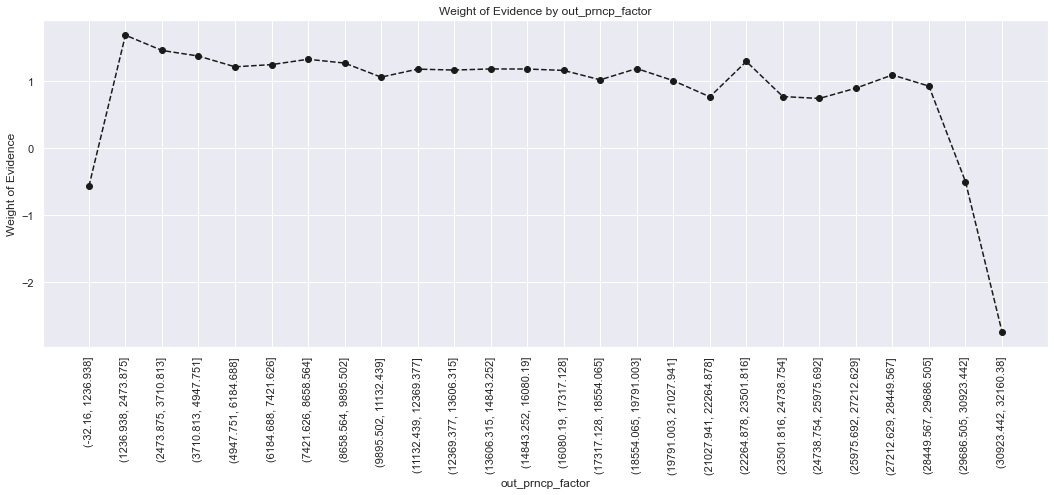

In [52]:
plot_by_woe(df_temp, 90)

In [53]:
# Initial examination shows that there are vey few obs with >25,000 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_pymnt'] <= 30000].copy(
)
# fine-classing
X_train_prepr_temp['total_pymnt_factor'] = pd.cut(
    X_train_prepr_temp['total_pymnt'], 20)
# preprocess 'total_acc'
df_temp = woe_discrete(
    X_train_prepr_temp, 'total_pymnt_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
total_pymnt_factor,,,,
"(-30.0, 1500.0]",0.095106,0.013226,-1.972805,0.581441
"(1500.0, 3000.0]",0.158470,0.051170,-1.130417,0.581441
"(3000.0, 4500.0]",0.159437,0.089449,-0.577981,0.581441
"(4500.0, 6000.0]",0.137421,0.108389,-0.237321,0.581441
"(6000.0, 7500.0]",0.106567,0.109014,0.022702,0.581441
"(7500.0, 9000.0]",0.083171,0.095047,0.133479,0.581441
"(9000.0, 10500.0]",0.063167,0.082764,0.270209,0.581441
"(10500.0, 12000.0]",0.047780,0.084836,0.574118,0.581441
"(12000.0, 13500.0]",0.036141,0.067108,0.618887,0.581441


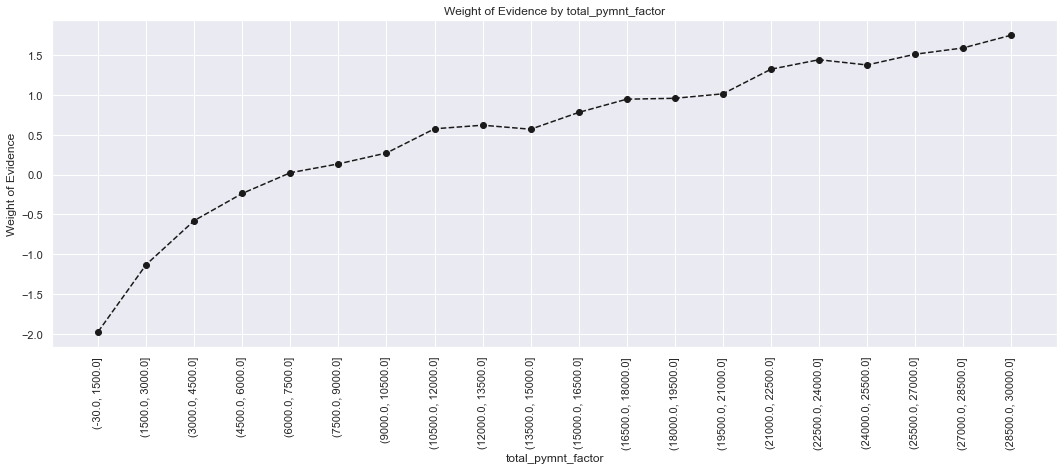

In [54]:
plot_by_woe(df_temp,90)

In [55]:
# Again, because of very few obs > 64,000, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['tot_cur_bal'] <= 64000].copy(
)
# fine-classing
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(
    X_train_prepr_temp['tot_cur_bal'], 25)
# preprocess
df_temp = woe_discrete(
    X_train_prepr_temp, 'tot_cur_bal_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
tot_cur_bal_factor,,,,
"(-64.0, 2560.0]",0.010797,0.012617,0.155786,0.002585
"(2560.0, 5120.0]",0.028209,0.032733,0.148762,0.002585
"(5120.0, 7680.0]",0.040805,0.045332,0.105194,0.002585
"(7680.0, 10240.0]",0.049998,0.052410,0.047119,0.002585
"(10240.0, 12800.0]",0.057293,0.055600,-0.029990,0.002585
"(12800.0, 15360.0]",0.058217,0.057754,-0.007978,0.002585
"(15360.0, 17920.0]",0.058363,0.058068,-0.005059,0.002585
"(17920.0, 20480.0]",0.062302,0.058389,-0.064878,0.002585
"(20480.0, 23040.0]",0.060503,0.057622,-0.048778,0.002585


The feature will be ignored for its low IV value

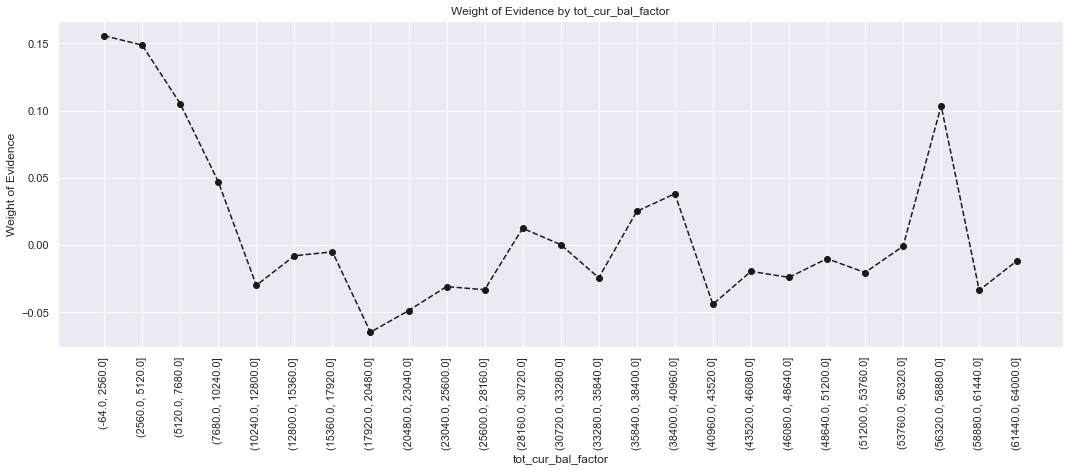

In [56]:
plot_by_woe(df_temp, 90)

In [57]:
# initial examination reveals very few obs > 79,780, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_rev_hi_lim'] <= 79750].copy(
)
# fine-classing
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(
    X_train_prepr_temp['total_rev_hi_lim'], 25)
# preprocess
df_temp = woe_discrete(
    X_train_prepr_temp, 'total_rev_hi_lim_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


good_bad,0,1,woe,iv
total_rev_hi_lim_factor,,,,
"(-79.743, 3189.72]",0.015640,0.011324,-0.322937,0.022793
"(3189.72, 6379.44]",0.056816,0.047407,-0.181059,0.022793
"(6379.44, 9569.16]",0.090557,0.080371,-0.119326,0.022793
"(9569.16, 12758.88]",0.105992,0.094940,-0.110116,0.022793
"(12758.88, 15948.6]",0.108222,0.097598,-0.103328,0.022793
"(15948.6, 19138.32]",0.099813,0.091816,-0.083514,0.022793
"(19138.32, 22328.04]",0.084096,0.082581,-0.018181,0.022793
"(22328.04, 25517.76]",0.074738,0.073455,-0.017307,0.022793
"(25517.76, 28707.48]",0.063893,0.063755,-0.002160,0.022793


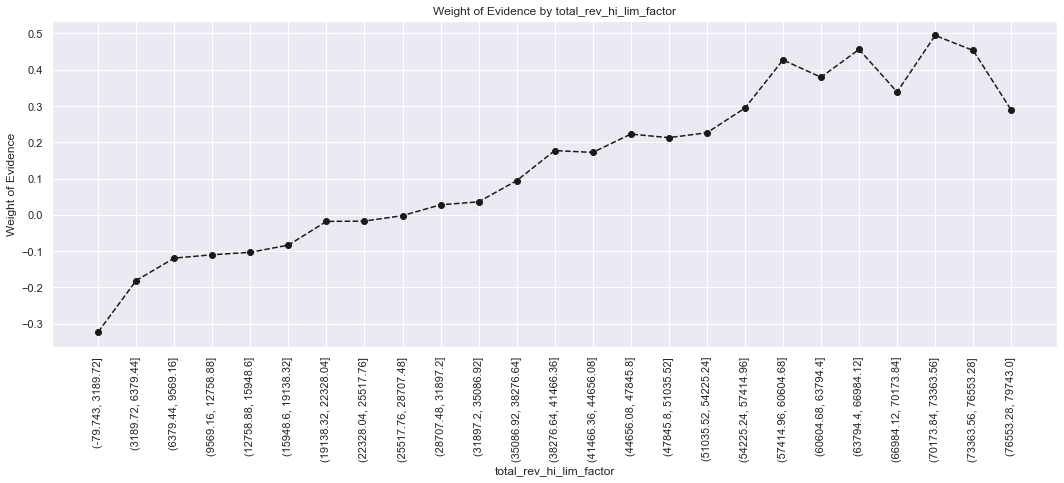

In [58]:
plot_by_woe(df_temp, 90)

In [59]:
# fine-classing
X_train_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(
    X_train_prepr['mths_since_earliest_cr_line'], 50)
# preprocess
df_temp = woe_discrete(
    X_train_prepr, 'mths_since_earliest_cr_line_factor', y_train_prepr)
df_temp


good_bad,0,1,woe,iv
mths_since_earliest_cr_line_factor,,,,
"(121.486, 132.28]",0.001982,0.002321,0.158130,0.016288
"(132.28, 142.56]",0.004945,0.004874,-0.014438,0.016288
"(142.56, 152.84]",0.008300,0.006138,-0.301756,0.016288
"(152.84, 163.12]",0.012715,0.010405,-0.200489,0.016288
"(163.12, 173.4]",0.022094,0.017499,-0.233168,0.016288
"(173.4, 183.68]",0.030413,0.022972,-0.280602,0.016288
"(183.68, 193.96]",0.034180,0.028392,-0.185538,0.016288
"(193.96, 204.24]",0.037928,0.033514,-0.123731,0.016288
"(204.24, 214.52]",0.041911,0.038298,-0.090142,0.016288


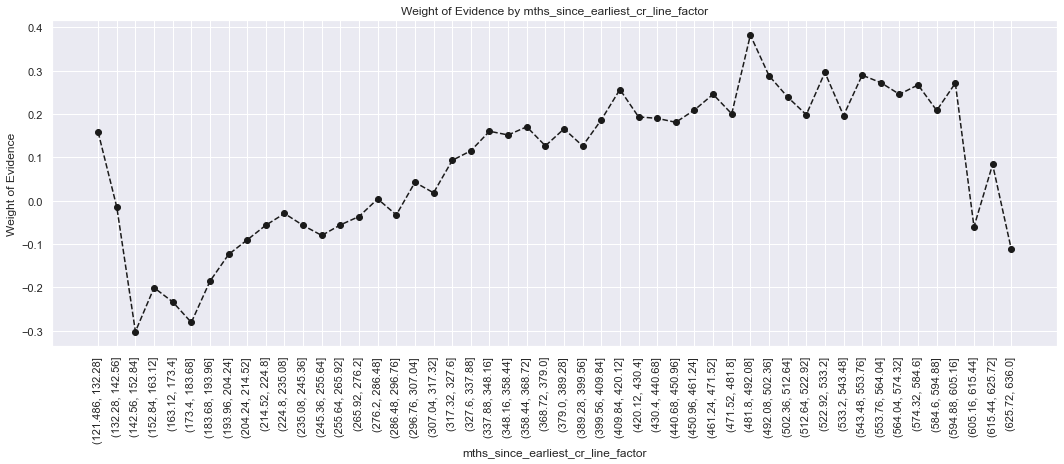

In [60]:
plot_by_woe(df_temp, 90)

The IV is borderline close to the minimum ideal threshold, so we will use the feature

In [61]:
# fine-classing
X_train_prepr['mths_since_issue_d_factor'] = pd.cut(
    X_train_prepr['mths_since_issue_d'], 24)
# preprocess
df_temp = woe_discrete(
    X_train_prepr, "mths_since_issue_d_factor", y_train_prepr)
df_temp


good_bad,0,1,woe,iv
mths_since_issue_d_factor,,,,
"(84.91, 88.75]",0.108558,0.190736,0.563604,0.110593
"(88.75, 92.5]",0.142580,0.185716,0.264318,0.110593
"(92.5, 96.25]",0.130297,0.144083,0.100568,0.110593
"(96.25, 100.0]",0.123842,0.121558,-0.018620,0.110593
"(100.0, 103.75]",0.089134,0.074497,-0.179382,0.110593
"(103.75, 107.5]",0.097336,0.073780,-0.277080,0.110593
"(107.5, 111.25]",0.073556,0.052572,-0.335865,0.110593
"(111.25, 115.0]",0.063785,0.040208,-0.461458,0.110593
"(115.0, 118.75]",0.028861,0.019438,-0.395261,0.110593


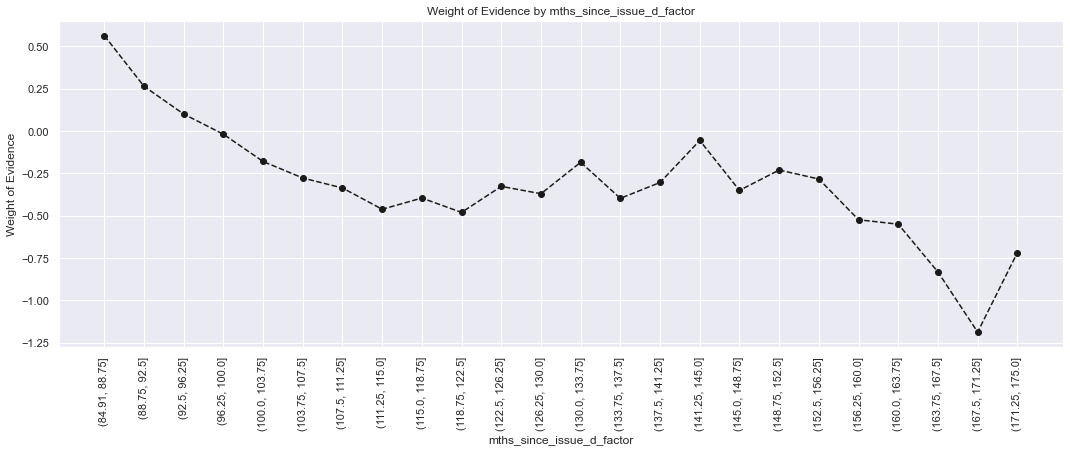

In [62]:
plot_by_woe(df_temp, 90)

In [63]:
# fine-classing
X_train_prepr['pub_rec_factor'] = pd.cut(
    X_train_prepr['pub_rec'], 2)
# preprocess
df_temp = woe_discrete(
    X_train_prepr, "pub_rec_factor", y_train_prepr)
df_temp


good_bad,0,1,woe,iv
pub_rec_factor,,,,
"(-0.063, 31.5]",1.0,0.999988,-0.000012,inf
"(31.5, 63.0]",0.0,0.000012,inf,inf


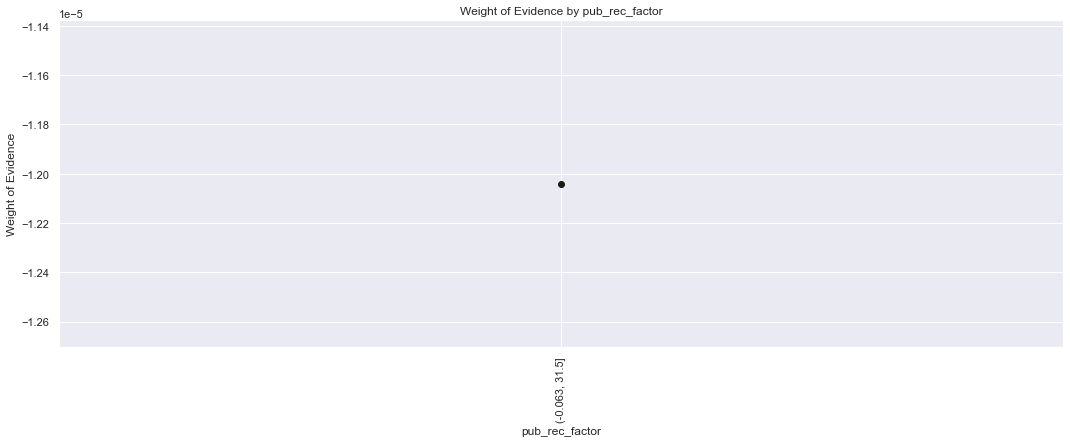

In [64]:
plot_by_woe(df_temp, 90)

We drop the feature due to the low IV

In [65]:
# filter out all values > 75 given the low obs
#X_train_prepr_temp = X_train_prepr[X_train_prepr['mths_since_last_credit_pull_d'] <= 75].copy()
# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories
X_train_prepr['mths_since_last_credit_pull_d_factor'] = pd.cut(X_train_prepr['mths_since_last_credit_pull_d'], 10)
# Calculate WoE
df_temp = woe_discrete(
    X_train_prepr, "mths_since_last_credit_pull_d_factor", y_train_prepr[X_train_prepr.index])
df_temp


good_bad,0,1,woe,iv
mths_since_last_credit_pull_d_factor,,,,
"(71.896, 82.4]",0.714552,0.882142,0.210698,0.188237
"(82.4, 92.8]",0.146599,0.062088,-0.859150,0.188237
"(92.8, 103.2]",0.081551,0.028961,-1.035274,0.188237
"(103.2, 113.6]",0.031533,0.013181,-0.872235,0.188237
"(113.6, 124.0]",0.012853,0.006791,-0.638018,0.188237
"(124.0, 134.4]",0.006279,0.004330,-0.371766,0.188237
"(134.4, 144.8]",0.003611,0.001640,-0.789249,0.188237
"(144.8, 155.2]",0.002414,0.000556,-1.467642,0.188237
"(155.2, 165.6]",0.000589,0.000137,-1.456021,0.188237


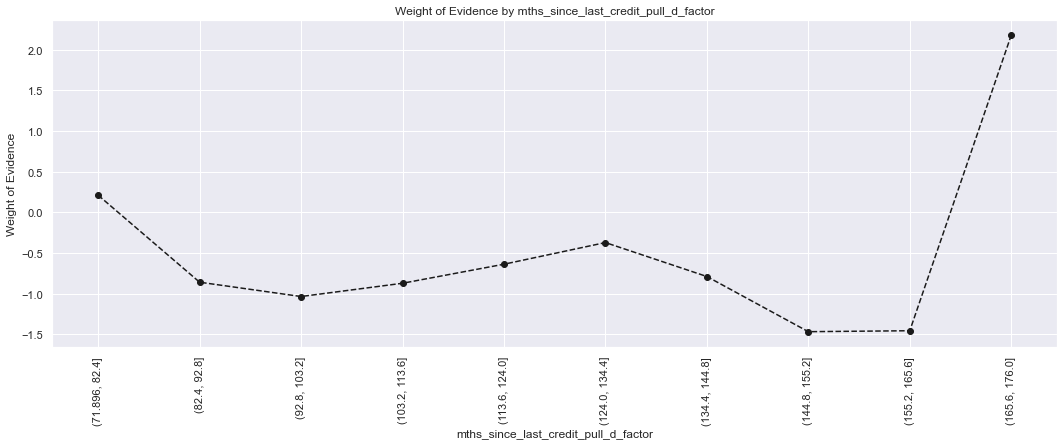

In [66]:
plot_by_woe(df_temp, 90)

In [67]:
X_train_prepr.columns

Index(['term', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'inq_last_6mths',
       'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'collection_recovery_fee', 'tot_cur_bal', 'total_rev_hi_lim',
       'mths_since_earliest_cr_line', 'mths_since_issue_d',
       'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d',
       'int_rate_factor', 'dti_factor', 'inq_last_6mths_factor',
       'out_prncp_factor', 'mths_since_earliest_cr_line_factor',
       'mths_since_issue_d_factor', 'pub_rec_factor',
       'mths_since_last_credit_pull_d_factor'],
      dtype='object')

The features to use:
1. grade
2. home_ownership
3. verification_status
4. purpose
5. term
6. int_rate
7. annual_inc
8. dti
9. revol_util
10. out_prncp
11. total_pymnt
12. total_rev_hi_lim
13. mths_since_earliest_cr_line
14. mths_since_issue_d
15. mths_since_last_credit_pull_d


### Preprocessing

In [68]:
x = X[['grade', 'home_ownership', 'verification_status', 'purpose', 'term', 'int_rate', 'annual_inc', 'dti','revol_util', 'out_prncp', 'total_pymnt', 'total_rev_hi_lim', 'mths_since_earliest_cr_line', 'mths_since_issue_d', 'mths_since_last_credit_pull_d']].copy()

In [69]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [70]:
import logging

In [71]:
class WoE_Binning(BaseEstimator, TransformerMixin):
    def __init__(self):  # no *args or *kargs
        self.woe_grade = None
        self.woe_home = None
        self.woe_verStatus = None
        self.woe_purpose = None
        self.woe_term = None
        self.woe_int_rate = None
        self.woe_annInc = None
        self.woe_dti = None
        self.woe_revolUtil = None
        self.woe_outPrncp = None
        self.woe_totalPymnt = None
        self.woe_totalRev = None
        self.woe_mthsECL = None
        self.woe_mthsID = None
        self.woe_mthsLCP = None

    def fit(self, X, y):
        logging.basicConfig(filename='./app.log', filemode='w',
                            format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S', level=logging.INFO)
        newX = X.copy()
        # grade woe calculation
        self.woe_grade = self.woe(X, 'grade', y)

        # home_ownership woe calculation
        self.woe_home = self.woe(X, 'home_ownership', y)

        # verification_status woe calculation
        self.woe_verStatus = self.woe(X, 'verification_status', y)

        # purpose woe calculation
        self.woe_purpose = self.woe(X, 'purpose', y)

        # term woe calculation
        self.woe_term = self.woe(X, 'term', y)

        # int_rate woe calculation
        # fine-classing using the 'cut' method, given the large number of unique values
        newX['int_rate_factor'] = pd.cut(newX['int_rate'], 50, right=False)
        # Process 'int_rate_factor' column through woe_ordered_continuous and plot_by_woe functions
        self.woe_int_rate = self.woe(newX, 'int_rate_factor', y)
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(
            left=self.woe_int_rate.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(
            left=0, right=self.woe_int_rate.index[0].right, closed='left')
        self.woe_int_rate = self.woe_int_rate.reset_index(
        )[['int_rate_factor', 'woe']].to_dict(orient='list')
        self.woe_int_rate['int_rate_factor'][0] = iv_start
        self.woe_int_rate['int_rate_factor'][-1] = iv_end
        self.woe_int_rate = pd.DataFrame(self.woe_int_rate)

        # annual_inc woe calculation
        # Initial examination shows that there are too few individuals with large income (up to $75m!!) and too many with small income.
        # Since 95.6% of observations have income < 151,858, we will have one category for more than 150K, and we are going to apply our approach to determine
        # the categories of everyone with 150k or less.
        new_X_temp = newX[newX['annual_inc'] <= 150500].copy()
        # fine-classing again
        new_X_temp['annual_inc_factor'] = pd.cut(new_X_temp['annual_inc'], 12)
        # make sure to select only the relevant indexes in the target column
        self.woe_annInc = self.woe(
            new_X_temp, 'annual_inc_factor', y[new_X_temp.index])
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(
            left=self.woe_annInc.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(
            left=0, right=self.woe_annInc.index[0].right, closed='left')
        self.woe_annInc = self.woe_annInc.reset_index(
        )[['annual_inc_factor', 'woe']].to_dict(orient='list')
        self.woe_annInc['annual_inc_factor'][0] = iv_start
        self.woe_annInc['annual_inc_factor'][-1] = iv_end
        self.woe_annInc = pd.DataFrame(self.woe_annInc)

        # dti woe calculation
        # fine-classing
        newX['dti_factor'] = pd.cut(newX['dti'], 10)
        # Process 'dti_factor' column through woe_ordered_continuous and plot_by_woe functions
        self.woe_dti = self.woe(newX, 'dti_factor', y)
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(
            left=self.woe_dti.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(
            left=0, right=self.woe_dti.index[0].right, closed='left')
        self.woe_dti = self.woe_dti.reset_index(
        )[['dti_factor', 'woe']].to_dict(orient='list')
        self.woe_dti['dti_factor'][0] = iv_start
        self.woe_dti['dti_factor'][-1] = iv_end
        self.woe_dti = pd.DataFrame(self.woe_dti)

        # revol_util woe calculation
        # Initial examination shows that there are some obs with utilization of >1 times which should be very rare, so we will filter them out first
        new_X_temp = newX[newX['revol_util'] <= 1].copy()
        # fine-classing
        new_X_temp['revol_util_factor'] = pd.cut(new_X_temp['revol_util'], 10)
        # preprocess 'revol_util'
        self.woe_revolUtil = self.woe(
            new_X_temp, 'revol_util_factor', y[new_X_temp.index])
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(
            left=self.woe_revolUtil.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(
            left=0, right=self.woe_revolUtil.index[0].right, closed='left')
        self.woe_revolUtil = self.woe_revolUtil.reset_index(
        )[['revol_util_factor', 'woe']].to_dict(orient='list')
        self.woe_revolUtil['revol_util_factor'][0] = iv_start
        self.woe_revolUtil['revol_util_factor'][-1] = iv_end
        self.woe_revolUtil = pd.DataFrame(self.woe_revolUtil)

        # out_prncp woe calculation
        # Here we do fine-classing: using the 'cut' method, we split the variable into 26 categories by its values.
        newX['out_prncp_factor'] = pd.cut(newX['out_prncp'], 26)
        # We calculate weight of evidence.
        self.woe_outPrncp = self.woe(newX, 'out_prncp_factor', y)
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(
            left=self.woe_outPrncp.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(
            left=0, right=self.woe_outPrncp.index[0].right, closed='left')
        self.woe_outPrncp = self.woe_outPrncp.reset_index(
        )[['out_prncp_factor', 'woe']].to_dict(orient='list')
        self.woe_outPrncp['out_prncp_factor'][0] = iv_start
        self.woe_outPrncp['out_prncp_factor'][-1] = iv_end
        self.woe_outPrncp = pd.DataFrame(self.woe_outPrncp)

        # total_pymnt woe calculation
        # Initial examination shows that there are vey few obs with >25,000 which should be very rare, so we will filter them out first
        new_X_temp = X[X['total_pymnt'] <= 30000].copy()
        # fine-classing
        new_X_temp['total_pymnt_factor'] = pd.cut(
            new_X_temp['total_pymnt'], 20)
        # preprocess 'total_pymnt'
        self.woe_totalPymnt = self.woe(
            new_X_temp, 'total_pymnt_factor', y[new_X_temp.index])
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(
            left=self.woe_totalPymnt.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(
            left=0, right=self.woe_totalPymnt.index[0].right, closed='left')
        self.woe_totalPymnt = self.woe_totalPymnt.reset_index(
        )[['total_pymnt_factor', 'woe']].to_dict(orient='list')
        self.woe_totalPymnt['total_pymnt_factor'][0] = iv_start
        self.woe_totalPymnt['total_pymnt_factor'][-1] = iv_end
        self.woe_totalPymnt = pd.DataFrame(self.woe_totalPymnt)

        # total_rev_hi_lim woe calculation
        # initial examination reveals very few obs > 79,780, we will filter them out first
        new_X_temp = newX[newX['total_rev_hi_lim'] <= 79750].copy()
        # fine-classing
        new_X_temp['total_rev_hi_lim_factor'] = pd.cut(
            new_X_temp['total_rev_hi_lim'], 25)
        # preprocess
        self.woe_totalRev = self.woe(
            new_X_temp, 'total_rev_hi_lim_factor', y[new_X_temp.index])
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(
            left=self.woe_totalRev.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(
            left=0, right=self.woe_totalRev.index[0].right, closed='left')
        self.woe_totalRev = self.woe_totalRev.reset_index(
        )[['total_rev_hi_lim_factor', 'woe']].to_dict(orient='list')
        self.woe_totalRev['total_rev_hi_lim_factor'][0] = iv_start
        self.woe_totalRev['total_rev_hi_lim_factor'][-1] = iv_end
        self.woe_totalRev = pd.DataFrame(self.woe_totalRev)

        # mths_since_earliest_cr_line woe calculation
        # fine-classing
        newX['mths_since_earliest_cr_line_factor'] = pd.cut(
            newX['mths_since_earliest_cr_line'], 50)
        # preprocess
        self.woe_mthsECL = self.woe(
            newX, 'mths_since_earliest_cr_line_factor', y)
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(
            left=self.woe_mthsECL.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(
            left=0, right=self.woe_mthsECL.index[0].right, closed='left')
        self.woe_mthsECL = self.woe_mthsECL.reset_index(
        )[['mths_since_earliest_cr_line_factor', 'woe']].to_dict(orient='list')
        self.woe_mthsECL['mths_since_earliest_cr_line_factor'][0] = iv_start
        self.woe_mthsECL['mths_since_earliest_cr_line_factor'][-1] = iv_end
        self.woe_mthsECL = pd.DataFrame(self.woe_mthsECL)

        # mths_since_issue_d woe calculation
        # fine-classing
        newX['mths_since_issue_d_factor'] = pd.cut(
            newX['mths_since_issue_d'], 24)
        # preprocess
        self.woe_mthsID = self.woe(newX, "mths_since_issue_d_factor", y)
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(
            left=self.woe_mthsID.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(
            left=0, right=self.woe_mthsID.index[0].right, closed='left')
        self.woe_mthsID = self.woe_mthsID.reset_index(
        )[['mths_since_issue_d_factor', 'woe']].to_dict(orient='list')
        self.woe_mthsID['mths_since_issue_d_factor'][0] = iv_start
        self.woe_mthsID['mths_since_issue_d_factor'][-1] = iv_end
        self.woe_mthsID = pd.DataFrame(self.woe_mthsID)

        # mths_since_last_credit_pull_d
        # filter out all values > 75 given the low obs
        #X_train_prepr_temp = X_train_prepr[X_train_prepr['mths_since_last_credit_pull_d'] <= 75].copy()
        # Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories
        newX['mths_since_last_credit_pull_d_factor'] = pd.cut(
            newX['mths_since_last_credit_pull_d'], 10)
        # Calculate WoE
        self.woe_mthsLCP = self.woe(
            newX, "mths_since_last_credit_pull_d_factor", y[newX.index])
        # Manipulation to include extreme bounds (0, infinity)
        iv_end = pd.Interval(
            left=self.woe_mthsLCP.index[-1].left, right=np.inf, closed='left')
        iv_start = pd.Interval(
            left=0, right=self.woe_mthsLCP.index[0].right, closed='left')
        self.woe_mthsLCP = self.woe_mthsLCP.reset_index(
        )[['mths_since_last_credit_pull_d_factor', 'woe']].to_dict(orient='list')
        self.woe_mthsLCP['mths_since_last_credit_pull_d_factor'][0] = iv_start
        self.woe_mthsLCP['mths_since_last_credit_pull_d_factor'][-1] = iv_end
        self.woe_mthsLCP = pd.DataFrame(self.woe_mthsLCP)

        return self

    def transform(self, X):
        newX = X.copy()

        # grade Processing
        newX.replace(
            {'grade': self.woe_grade[['woe']].to_dict()['woe']}, inplace=True)

        # home_ownership processing
        newX.replace(
            {'home_ownership': self.woe_home[['woe']].to_dict()['woe']}, inplace=True)

        # verification_status processing
        newX.replace({'verification_status': self.woe_verStatus[[
                     'woe']].to_dict()['woe']}, inplace=True)

        # purpose processing
        newX.replace(
            {'purpose': self.woe_purpose[['woe']].to_dict()['woe']}, inplace=True)

        # term processing
        newX.replace(
            {'term': self.woe_term[['woe']].to_dict()['woe']}, inplace=True)

        # int_rate processing
        logging.info('int_rate processing...started')
        newX['int_rate'] = np.vectorize(self.replace_woe)(newX['int_rate'], self.woe_int_rate, 'int_rate_factor')
        logging.info('int_rate processing...end')

        # annual_inc processing
        logging.info('annual_inc processing...started')
        newX['annual_inc'] = self.replace_woe(
            newX['annual_inc'], self.woe_annInc, 'annual_inc_factor')
        logging.info('annual_inc processing...end')

        # dti processing
        logging.info('dti processing...started')
        newX['dti'] = self.replace_woe(newX['dti'], self.woe_dti, 'dti_factor')
        logging.info('dti processing...end')

        # revol_util processing
        logging.info('revol_util processing...started')
        newX['revol_util'] = self.replace_woe(
            newX['revol_util'], self.woe_revolUtil, 'revol_util_factor')
        logging.info('revol_util processing...end')

        # out_prncp processing
        logging.info('out_prncp processing...started')
        newX['out_prncp'] = self.replace_woe(
            newX['out_prncp'], self.woe_outPrncp, 'out_prncp_factor')
        logging.info('out_prncp processing...end')

        # total_pymnt processing
        logging.info('total_pymnt processing...started')
        newX['total_pymnt'] = self.replace_woe(
            newX['total_pymnt'], self.woe_totalPymnt, 'total_pymnt_factor')
        logging.info('total_pymnt processing...end')

        # total_rev_hi_lim
        logging.info('total_rev_hi_lim...started')
        newX['total_rev_hi_lim'] = self.replace_woe(
            newX['total_rev_hi_lim'], self.woe_totalRev, 'total_rev_hi_lim_factor')
        logging.info('total_rev_hi_lim...end')

        # mths_since_earliest_cr_line
        logging.info('mths_since_earliest_cr_line...started')
        newX['mths_since_earliest_cr_line'] = self.replace_woe(
            newX['mths_since_earliest_cr_line'], self.woe_mthsECL, 'mths_since_earliest_cr_line_factor')
        logging.info('mths_since_earliest_cr_line...end')

        # mths_since_issue_d
        logging.info('mths_since_issue_d...started')
        newX['mths_since_issue_d'] = self.replace_woe(
            newX['mths_since_issue_d'], self.woe_mthsID, 'mths_since_issue_d_factor')
        logging.info('mths_since_issue_d...end')

        # mths_since_last_credit_pull_d
        logging.info('mths_since_last_credit_pull_d...started')
        newX['mths_since_last_credit_pull_d_factor'] = self.replace_woe(
            newX['mths_since_last_credit_pull_d'], self.woe_mthsLCP, 'mths_since_last_credit_pull_d_factor')
        logging.info('mths_since_last_credit_pull_d...end')

        return newX

    def woe(self, df, cat_variabe_name, y_df):
        """
        woe(weight of evidence) function
        """
        df['good_bad'] = y_df.values.ravel()
        df_woe_iv = pd.crosstab(df[cat_variabe_name], df['good_bad'], normalize='columns').assign(
            woe=lambda dfx: np.log(dfx[1]/dfx[0])).assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0])))
        return df_woe_iv

    def replace_woe(self, col, woe_sheet, name):
        woe_t = []
        arr_iv = pd.arrays.IntervalArray(woe_sheet[name], closed='left')
        for i in col.values:
            idx = np.argwhere(arr_iv.contains(i)).ravel()[0]
            woe_t.append(woe_sheet.iloc[idx]['woe'])
        return woe_t


In [72]:
def replace_woe(val, woe_sheet, name):
    arr_iv = pd.arrays.IntervalArray(woe_sheet[name], closed='left')
    idx = np.argwhere(arr_iv.contains(val)).ravel()[0]
    return woe_sheet.iloc[idx]['woe']

In [73]:
x[x.home_ownership == 'ANY']


,grade,home_ownership,verification_status,purpose,term,int_rate,annual_inc,dti,revol_util,out_prncp,total_pymnt,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_credit_pull_d
311334,B,ANY,Source Verified,debt_consolidation,36,11.67,35680.0,28.12,43.1,0.0,5048.625,7700.0,217.0,88.0,72.0


In [74]:
dup = pd.concat([x[x.home_ownership == 'ANY']]*7, ignore_index=True)


In [75]:
x = pd.concat([x, dup], axis=0, ignore_index=True)

In [76]:
x.reset_index(drop=True, inplace=True)

In [77]:
y = pd.concat([y, pd.Series([y.iloc[-1]]*7)])


In [78]:
y.reset_index(drop=True, inplace=True)


In [79]:
x[x.home_ownership == 'ANY']


,grade,home_ownership,verification_status,purpose,term,int_rate,annual_inc,dti,revol_util,out_prncp,total_pymnt,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_credit_pull_d
311334,B,ANY,Source Verified,debt_consolidation,36,11.67,35680.0,28.12,43.1,0.0,5048.625,7700.0,217.0,88.0,72.0
466285,B,ANY,Source Verified,debt_consolidation,36,11.67,35680.0,28.12,43.1,0.0,5048.625,7700.0,217.0,88.0,72.0
466286,B,ANY,Source Verified,debt_consolidation,36,11.67,35680.0,28.12,43.1,0.0,5048.625,7700.0,217.0,88.0,72.0
466287,B,ANY,Source Verified,debt_consolidation,36,11.67,35680.0,28.12,43.1,0.0,5048.625,7700.0,217.0,88.0,72.0
466288,B,ANY,Source Verified,debt_consolidation,36,11.67,35680.0,28.12,43.1,0.0,5048.625,7700.0,217.0,88.0,72.0
466289,B,ANY,Source Verified,debt_consolidation,36,11.67,35680.0,28.12,43.1,0.0,5048.625,7700.0,217.0,88.0,72.0
466290,B,ANY,Source Verified,debt_consolidation,36,11.67,35680.0,28.12,43.1,0.0,5048.625,7700.0,217.0,88.0,72.0
466291,B,ANY,Source Verified,debt_consolidation,36,11.67,35680.0,28.12,43.1,0.0,5048.625,7700.0,217.0,88.0,72.0


Due to the 'ANY' home_ownership category being with count 1, I will duplicate it to increase the chance of being in the test and train datasets

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [81]:
means_tr = X_train[x.select_dtypes(include='number').columns.values].mean()
means_te = X_test[X_test.select_dtypes(include='number').columns.values].mean()

In [82]:
X_train.fillna(means_tr, axis=0, inplace=True)
X_test.fillna(means_te, axis=0, inplace=True)

In [83]:
binn = WoE_Binning()

In [84]:
binn.fit(X_train, y_train)

WoE_Binning()

In [85]:
binn.woe_int_rate

,int_rate_factor,woe
0,"[0.0, 5.833)",1.150899
1,"[5.833, 6.246)",1.758130
2,"[6.246, 6.658)",1.422355
3,"[6.658, 7.071)",1.364968
4,"[7.071, 7.484)",1.615381
5,"[7.484, 7.897)",1.184804
6,"[7.897, 8.31)",0.838247
7,"[8.31, 8.722)",1.219977
8,"[8.722, 9.135)",0.630374
9,"[9.135, 9.548)",1.234018


In [96]:
logging.basicConfig(filename='./tests.log', filemode='a',
                    format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S', level=logging.INFO)


In [99]:
def replace_woe(val, woe_sheet, name):
    arr_iv = pd.arrays.IntervalArray(woe_sheet[name], closed='left')
    idx = np.argwhere(arr_iv.contains(val)).ravel()[0]
    return woe_sheet.iloc[idx]['woe']

In [104]:
logging.info('Test startet...')
trial = [replace_woe(x, binn.woe_int_rate, 'int_rate_factor') for _  , x in X_train[['int_rate']].iteritems()]
# X_train['int_rate'].apply(lambda x: replace_woe(x, binn.woe_int_rate, 'int_rate_factor'), raw=True, axis=1)
logging.info('...test ended.')

TypeError: 'numpy.ndarray' object is not callable

In [92]:
trial

0.5759853899841443

In [ ]:
num_pipe = Pipeline([
    ('binning', WoE_Binning()),
    ('scaler_1', RobustScaler()),
    ('scaler_2', MinMaxScaler())
])

In [ ]:
X_train_t = num_pipe.fit_transform(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
import joblib

In [ ]:
joblib.dump(num_pipe, './binning.joblib')

### Modelling

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, recall_score


In [ ]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'AUROC/Mean Score: {scores.mean()}')
    print(f'Std: {scores.std()}')
    print(f'GINI: {(scores.mean()*2)-1}')

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, random_state=42, n_jobs=-1)


In [ ]:
X_train.shape

1. RandomForestClassifier

In [ ]:
rf_cls = RandomForestClassifier()

scores_rf = cross_val_score(
    rf_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv)
display_scores(scores_rf)
y_pred_rf = rf_cls.predict(X_test)

print(f'Recall: {recall_score(y_test.values.ravel(), y_pred_rf)}')

2. XGBClassifier

In [ ]:
xgb_cls = XGBClassifier(objective='binary:logistic', eval_metric='error', use_label_encoder=False)

scores_xgb = cross_val_score(
    xgb_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv)
display_scores(scores_xgb)

y_pred_xgb = xgb_cls.predict(X_test)
print(f'Recall: {recall_score(y_test.values.ravel(), y_pred_xgb)}')
